In [1]:
from torchvision import datasets
data_path = '../data/'
cifar10 = datasets.CIFAR10(data_path,train=True,download=True)
cifar10_val = datasets.CIFAR10(data_path,train=False,download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
# 이미지 데이터를 변경하는 라이브러리
from torchvision import transforms
dir(transforms) # 해당 명령어가 가지고 있는 함수리스트를 보여줌

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [3]:
img, label =  cifar10[0] # 0번째 데이터를 가져온다

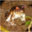

In [4]:
img

In [5]:
# Torch에서 제공하는 데이터를 변환작업을 하지 않으면 이미지 데이터를 가져오고
# 수치데이터로 변경하려면
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [6]:
# Sample 데이터은 CIFAR-10의 채널은 3
import torch.nn as nn
conv = nn.Conv2d(3,16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [7]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [8]:
# nn.Conv2d는 입력으로 B C H W 받으므로 이미지 한개를 적용해 보려면 0번째 차원을 unsqueeze를 통해서 늘린다.(배치사이즈로사용)

In [9]:
img,label = cifar10[0]
img_t = to_tensor(img)
print(img_t.shape)
img_t = img_t.unsqueeze(0)
img_t.shape

torch.Size([3, 32, 32])


torch.Size([1, 3, 32, 32])

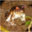

In [10]:
img

In [11]:
output =  conv(img_t)
output.shape

torch.Size([1, 16, 30, 30])

In [12]:
import matplotlib.pylab as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [13]:
output[0,0].detach().shape

torch.Size([30, 30])

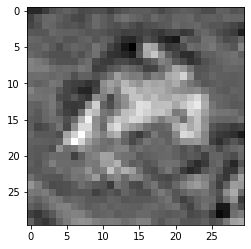

In [14]:
plt.imshow(output[0,0].detach(),cmap='gray')

In [15]:
import torch
tensor_cifar10 = datasets.CIFAR10(data_path,train=True,download=False, transform=transforms.ToTensor())
for image, label in tensor_cifar10:
    print(image.shape, label)
    break

torch.Size([3, 32, 32]) 6


In [16]:
imgs = torch.stack( [img_t for img_t, label in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [17]:
imgs.view(3,-1)

tensor([[0.2314, 0.6039, 1.0000,  ..., 0.0471, 0.7647, 0.6392],
        [0.2431, 0.6941, 1.0000,  ..., 0.1216, 0.7451, 0.6392],
        [0.2471, 0.7333, 1.0000,  ..., 0.1961, 0.6706, 0.6314]])

In [18]:
# 채널별로 평균
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [19]:
# 채널별로 표준편차
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [20]:
torch_normalize = transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

In [21]:
# 데이터를 가져올때는 데이터를 정규화하면서 가져온다.
from torchvision import datasets
data_path = '../data/'
cifar10 = datasets.CIFAR10(data_path,train=True,download=True
                           ,transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           torch_normalize
                                       ])    
                          )

cifar10_val = datasets.CIFAR10(data_path,train=False,download=True
                           ,transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           torch_normalize
                                       ])    
                          )

Files already downloaded and verified
Files already downloaded and verified


In [22]:
img,label = cifar10[0]

In [23]:
img.shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


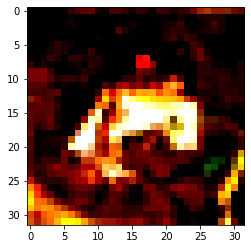

In [24]:
# plt 로 이미지를 그릴대는 마지막이 차수
plt.imshow(img.permute(1,2,0) )

In [25]:
conv(img).shape

torch.Size([16, 30, 30])

torch.Size([30, 30])


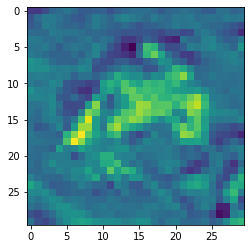

In [26]:
print(conv(img)[0].detach().shape)
plt.imshow(conv(img)[0].detach())

In [27]:
# nn.Module  sub - classing
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size=3,padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2) #특성크기를 줄여줌
        self.conv2 = nn.Conv2d(16,8,kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        # 신경망
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(8*8*8,32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32,2)
    def forward(self,x):
        out = self.pool1((self.act1(self.conv1(x))))
        out = self.pool2((self.act2((self.conv2(out)))))
        out = self.flatten(out)
        out = self.fc2(self.act3(self.fc1(out)))
        return out
        

In [28]:
model = Net()

In [29]:
numel_lilst = [p.numel() for p in model.parameters()]
sum(numel_lilst), numel_lilst

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [30]:
model

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): Tanh()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): Tanh()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=512, out_features=32, bias=True)
  (act3): Tanh()
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [31]:
import torch.nn.functional as F

In [32]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size=3,padding=1)                
        self.conv2 = nn.Conv2d(16,8,kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8*8*8,32)        
        self.fc2 = nn.Linear(32,2)
    def forward(self,x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)),2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)),2)
        out = out.view(-1,8*8*8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [33]:
img.shape, img.unsqueeze(0).shape

(torch.Size([3, 32, 32]), torch.Size([1, 3, 32, 32]))

In [34]:
model = Net()
model(img.unsqueeze(0))

tensor([[0.0562, 0.0618]], grad_fn=<AddmmBackward0>)

In [35]:
# 훈련
# 1.모델에 입력값을 넣고
# 2. 손실값을 계산
# 3. 이전 기울기값을 0으로 리셋하고
# 4. loss.backward() 호출해서 모든 파라미터에 대한 손실 값의 기울기를 계산(역방향)
# 5. Optimizer을 통해 손실값을 낮추도록 파라미터를 조정

In [36]:
import datetime
from tqdm import tqdm
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in tqdm(range(1, n_epochs+1)):
        loss_train = 0.0
        for imgs, labels in train_loader: # 데이터 로더가 만들어준 배치 안에서 데이터 셋을 순환
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)  # 손실값을 계산
            optimizer.zero_grad() # 마지막 이전 기울기 값을 지움
            loss.backward() # 역전파 수행, 즉 신경망이 학습할 모든 파라미터에 대한 기울기를 계산
            optimizer.step()  # Model 업데이트
            loss_train += loss.item() # 매번 모든 손실값을 기록한다. - 배치단위
        # 출력
        if epoch == 1 or epoch % 10 == 0:
            print(f"{datetime.datetime.now()} epoch:{epoch} loss:{loss_train /len(train_loader) }")
            
            

In [37]:
label_map = {0:0, 2:1}
class_name = ['airplane','bird']
cifar2 = [(img,label_map[label]) for img,label in cifar10 if label in [0,2]]
cifar2_val = [(img,label_map[label]) for img,label in cifar10_val if label in [0,2]]

In [38]:
train_loader = torch.utils.data.DataLoader(cifar2,batch_size=64,shuffle=True)

In [39]:
model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = torch.nn.CrossEntropyLoss()

In [40]:
training_loop(
    n_epochs=50, optimizer=optimizer, model=model, loss_fn=loss_fn, train_loader=train_loader
)

  2%|█▋                                                                                 | 1/50 [00:07<06:00,  7.36s/it]

2022-12-12 19:32:42.013436 epoch:1 loss:0.5592976552285965


 20%|████████████████▍                                                                 | 10/50 [00:57<03:36,  5.42s/it]

2022-12-12 19:33:31.731562 epoch:10 loss:0.33808553617471343


 40%|████████████████████████████████▊                                                 | 20/50 [01:52<02:43,  5.45s/it]

2022-12-12 19:34:26.755487 epoch:20 loss:0.3012606020376181


 60%|█████████████████████████████████████████████████▏                                | 30/50 [02:46<01:47,  5.39s/it]

2022-12-12 19:35:21.380071 epoch:30 loss:0.27068073639444484


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [03:45<01:01,  6.17s/it]

2022-12-12 19:36:20.532121 epoch:40 loss:0.2487049220473903


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:18<00:00,  5.18s/it]

2022-12-12 19:36:53.523766 epoch:50 loss:0.22873029582629537


In [41]:
# 정확도 측정
train_loader = torch.utils.data.DataLoader(cifar2,batch_size=64,shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val,batch_size=64,shuffle=False)

In [42]:
def validate(model, train_loader, val_loader):
    for name, loader in [('train',train_loader),('val',val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():  # 파라미터를 업데이트 하지 않기때문에 기울기는 필요없음
            for imgs, labels in loader:
                output = model(imgs)
                _,predicted =  torch.max(output, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        print(f"accuracy: {name} : {correct / total}")

In [43]:
validate(model,train_loader,val_loader)

accuracy: train : 0.8976
accuracy: val : 0.8755
